In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn




In [2]:
train_data = pd.read_csv("C:/Users/Ayo/Downloads/titanic/train.csv")
test_data = pd.read_csv("C:/Users/Ayo/Downloads/titanic/test.csv")
gender_submission_data = pd.read_csv("C:/Users/Ayo/Downloads/titanic/gender_submission.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_data['Survived'] = train_data['Survived'].replace(['Survived', 'Died'],[1, 0])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data['Survived'].astype(str)
train_data["Sex"].count()


891

In [6]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
passengers_gender_count = train_data["Sex"].value_counts()
print(passengers_gender_count)
# passengers_gender_count.rename(columns ={'Sex':'value_counts'}, inplace=True)
# passengers_gender_count.index.name= 'Sex'

male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

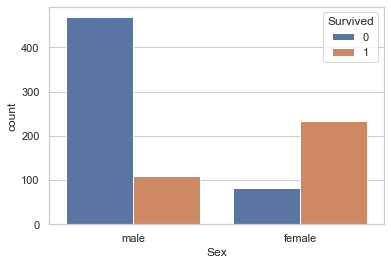

In [8]:
sn.set_theme(style='whitegrid')
sn.countplot(x='Sex', hue='Survived', data=train_data)

0 refers to death while 1 refers to survive

In [9]:
female_survivor = train_data.loc[train_data.Sex == "female"]["Survived"]
print(sum(female_survivor))
female_survivor_rate = sum(female_survivor)/len(female_survivor)
print('percentage of female survivor is:', female_survivor_rate)

233
percentage of female survivor is: 0.7420382165605095


This indicates that 74% of the women survived the crash of the female onboard

In [10]:
male_survivor = train_data.loc[train_data.Sex == 'male']["Survived"]
print( sum(male_survivor))
rate_male_survivor = sum(male_survivor)/len(male_survivor)

print("percentage of men who survived:", rate_male_survivor)

109
percentage of men who survived: 0.18890814558058924


Only 19% of the men survived the crash out of the men onboard

In [16]:
Total_survivor = train_data.loc[train_data.Survived == 1]['Survived']
print(Total_survivor.count())


342


In [18]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
print(output)
output.to_csv("C:/Users/Ayo/Desktop/results.csv")

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
